# PLAN

- [x] Acquisition
    - [x] read the csv into a dataframe
- [ ] Preparation
    - [ ] no missing values
    - [ ] drop columns that are not needed
    - [x] change case to lower case
    - [ ] make sure everything has right dtype
    - [ ] normalize what needs to be normalized
    - [x] rename columns for clarification
- [ ] Exploration
    - [ ] answer ALL questions raised
        - [x] Which locations are the most frequent sites of SSO?
        - [x] Which location have the most volume of overflow?
        - [x] What are most common root causes of SSO?
        - [x] Where do the majority of overflow go?

    - [ ] visualize important findings
    - [ ] decide what TODO items to keep
- [ ] Modeling
    - [ ] predict 
- [ ] Delivery
    - [ ] report
    - [ ] prezi slides
    - [ ] website

# ENVIRONMENT

In [1]:
import os
import acquire
import prepare
import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

from datetime import timedelta, datetime
from pylab import rcParams

# to explode the DataFrames and avoid truncation
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from fbprophet import Prophet

# ACQUIRE

#### _Let's read in the data from the csv file and take a peek at te first five records._

In [2]:
df = acquire.read_data('saws-sso.csv')

In [3]:
df.head()

SSO_ID   INSPKEY  SERVNO REPORTDATE  SPILL_ADDRESS     SPILL_ST_NAME  TOTAL_GAL  GALSRET     GAL           SPILL_START            SPILL_STOP       HRS       CAUSE                                           COMMENTS       ACTIONS     WATERSHED UNITID UNITID2 DISCHARGE_TO DISCHARGE_ROUTE  COUNCIL_DISTRICT FERGUSON  Month  Year  Week  EARZ_ZONE Expr1029  PIPEDIAM  PIPELEN PIPETYPE  INSTYEAR  DWNDPTH  UPSDPTH  Inches_No  RainFall_Less3          SPILL ADDRESS SewerAssetExp  NUM_SPILLS_COMPKEY  NUM_SPILLS_24MOS PREVSPILL_24MOS UNITTYPE   ASSETTYPE LASTCLND ResponseTime ResponseDTTM  Public Notice  TIMEINT Root_Cause STEPS_TO_PREVENT     SPILL_START_2      SPILL_STOP_2  HRS_2  GAL_2 SPILL_START_3 SPILL_STOP_3  HRS_3  GAL_3
0    6582  567722.0     NaN    3/10/19           3200  THOUSAND OAKS DR       2100   2100.0  2100.0  3/10/2019 1:16:00 PM  3/10/2019 2:40:00 PM  1.400000      Grease  Spill ContainedReturned to SystemArea Cleaned ...  CLEANED MAIN  SALADO CREEK  66918   66917       STREET            None               NaN    172A2      3  2019    11        0.0      NaN       8.0    16.55      PVC    1997.0      NaN      NaN        NaN             NaN  3200 THOUSAND OAKS DR           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         0.45    10-Mar-19          False     24.0        NaN              NaN               NaN               NaN   0.00    0.0           NaN          NaN    0.0    0.0
1    6583  567723.0     NaN    3/10/19           6804       S FLORES ST         80      0.0    80.0  3/10/2019 2:25:00 PM  3/10/2019 3:45:00 PM  1.333333      Grease        Spill ContainedArea Cleaned and Disinfected  CLEANED MAIN      DOS RIOS  24250   24193   STORMDRAIN            None               3.0    251A3      3  2019    11        0.0      NaN       8.0   157.00      PVC    1988.0      NaN      NaN        NaN             NaN          6804 S FLORES           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         1.08    10-Mar-19          False    120.0        NaN              NaN               NaN               NaN   0.00    0.0           NaN          NaN    0.0    0.0
2    6581  567714.0     NaN     3/9/19            215   AUDREY ALENE DR         79      0.0    10.0   3/9/2019 6:00:00 PM   3/9/2019 7:30:00 PM  1.500000  Structural  Spill ContainedArea Cleaned and DisinfectedFlu...  CLEANED MAIN      DOS RIOS   2822    3351        ALLEY            None               1.0    190E4      3  2019    10        0.0      NaN       8.0   350.00       CP    1955.0      NaN      NaN        NaN             NaN    215 Audrey Alene Dr           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         1.00    09-Mar-19          False     24.0        NaN              NaN  03/10/2019 09:36  03/10/2019 10:45   1.15   69.0           NaN          NaN    0.0    0.0
3    6584  567713.0     NaN     3/9/19           3602    SE MILITARY DR         83      0.0    83.0   3/9/2019 3:37:00 PM   3/9/2019 5:00:00 PM  1.383333      Grease  Spill ContainedArea Cleaned and DisinfectedFlu...           NaN  SALADO CREEK  92804   92805     EASEMENT            None               3.0    252C3      3  2019    10        0.0      NaN       8.0   213.91      PVC    1983.0      NaN      NaN        NaN             NaN    3602 SE MILITARY DR           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         0.55    09-Mar-19          False    120.0        NaN              NaN               NaN               NaN   0.00    0.0           NaN          NaN    0.0    0.0
4    6580  567432.0     NaN     3/6/19            100          PANSY LN         75      0.0    75.0   3/6/2019 9:40:00 AM   3/6/2019 9:55:00 AM  0.250000  Structural  Spill ContainedArea Cleaned and DisinfectedFlu...  CLEANED MAIN  SALADO CREEK  61141   49543       STREET            None               2.0    192A7      3  2019    10        0.0      NaN      12.

# PREPARE

#### _Let's convert the column to lowercase to make them easier to work with and also rename the column names for clarity._

In [4]:
df = prepare.lowercase_and_rename(df)

In [5]:
df.head().T

0                                            1                                                  2                                                  3                                                  4
sso_id                                                             6582                                         6583                                               6581                                               6584                                               6580
inspection_key                                                   567722                                       567723                                             567714                                             567713                                             567432
service_number                                                      NaN                                          NaN                                                NaN                                                NaN                                                NaN
report_date                                                     3/10/19                                      3/10/19                                             3/9/19                                             3/9/19                                             3/6/19
spill_address                                                      3200                                         6804                                                215                                               3602                                                100
spill_street_name                                      THOUSAND OAKS DR                                  S FLORES ST                                    AUDREY ALENE DR                                     SE MILITARY DR                                           PANSY LN
total_gallons                                                      2100                                           80                                                 79                                                 83                                                 75
gallons_returned                                                   2100                                            0                                                  0                                                  0                                                  0
gallons_1                                                          2100                                           80                                                 10                                                 83                                                 75
spill_start_1                                      3/10/2019 1:16:00 PM                         3/10/2019 2:25:00 PM                                3/9/2019 6:00:00 PM                                3/9/2019 3:37:00 PM                                3/6/2019 9:40:00 AM
spill_stop_1                                       3/10/2019 2:40:00 PM                         3/10/2019 3:45:00 PM                                3/9/2019 7:30:00 PM                                3/9/2019 5:00:00 PM                                3/6/2019 9:55:00 AM
hours_1                                                             1.4                                      1.33333                                                1.5                                            1.38333                                               0.25
cause                                                            Grease                                       Grease                                         Structural                                             Grease                                         Structural
comments              Spill ContainedReturned to SystemArea Cleaned ...  Spill ContainedArea Cleaned and Disinfected  Spill ContainedArea Cleaned and DisinfectedFlu...  Spill ContainedArea Cleaned and DisinfectedFlu...  Spill ContainedArea Cleaned and DisinfectedFlu...
actions             

#### _Let's make copies of the original dataframe before dropping some columns and rows to cover scenarios where we uncover more information about the variables._

In [6]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#### _Let's prepare df1 for EDA_
0. remove columns that do not add information
0. drop the columns that are no longer needed.
0. Make new variable of whether this incident involved two or more spills within 24 hours
0. Remove redundant columns
0. Rename spill details into simpler names
0. Change column values to lowercase
0. Change address into titlecase
0. Fix the data types
0. Fill nan's
0. Change data type to datetime

In [7]:
df1 = prepare.ready_df1(df1)
df1

report_date  total_gallons  gallons_returned             spill_start              spill_stop        hours                                              cause                                            actions          watershed          unit_id_1 unit_id_2                                       discharge_to        discharge_route  council_district  month  year  week  edwards_zone  pipe_diameter   pipe_length pipe_type  installation_year  inches_no  rainfall_less_3  num_spills_compkey  num_spills_24mos  unit_type           asset_type last_cleaned response_time response_datetime  public_notice  time_int     root_cause    steps_to_prevent         spill_street_address  multiple_spills
0     2019-03-10           2100            2100.0    3/10/2019 1:16:00 PM    3/10/2019 2:40:00 PM     1.400000                                             grease                                       cleaned main       salado creek              66918     66917                                             street                   none                 0      3  2019    11             0            8.0     16.550000       pvc               1997       0.00             0.00                   1                 1    gravity           sewer main          NaT          0.45        2019-03-10          False        24             na                  na        3200 Thousand Oaks Dr            False
1     2019-03-10             80               0.0    3/10/2019 2:25:00 PM    3/10/2019 3:45:00 PM     1.333333                                             grease                                       cleaned main           dos rios              24250     24193                                         stormdrain                   none                 3      3  2019    11             0            8.0    157.000000       pvc               1988       0.00             0.00                   1                 1    gravity           sewer main          NaT          1.08        2019-03-10          False       120             na                  na             6804 S Flores St            False
2     2019-03-09             79               0.0     3/9/2019 6:00:00 PM     3/9/2019 7:30:00 PM     1.500000                                         structural                                       cleaned main           dos rios               2822      3351                                              alley                   none                 1      3  2019    10             0            8.0    350.000000        cp               1955       0.00             0.00                   1                 1    gravity           sewer main          NaT          1.00        2019-03-09          False        24             na                  na          215 Audrey Alene Dr             True
3     2019-03-09             83               0.0     3/9/2019 3:37:00 PM     3/9/2019 5:00:00 PM     1.383333                                             grease                                                 na       salado creek              92804     92805                                           easement                   none                 3      3  2019    10             0            8.0    213.910000       pvc               1983       0.00             0.00                   1                 1    gravity           sewer main          NaT          0.55        2019-03-09          False       120             na                  na          3602 Se Military Dr            False
4     2019-03-06             75               0.0     3/6/2019 9:40:00 AM     3/6/2019 9:55:00 AM     0.250000                                         structural                                       cleaned main       salado creek              61141     49543                                             street                   none                 2      3  2019    10             0           12.0    291.900000        cp               1952       0.00             0.00                   2                 2    gravity           sewer mai

In [8]:
df1.dtypes

report_date             datetime64[ns]
total_gallons                    int64
gallons_returned               float64
spill_start                     object
spill_stop                      object
hours                          float64
cause                           object
actions                         object
watershed                       object
unit_id_1                       object
unit_id_2                       object
discharge_to                    object
discharge_route                 object
council_district                 int64
month                            int64
year                             int64
week                             int64
edwards_zone                     int64
pipe_diameter                  float64
pipe_length                    float64
pipe_type                       object
installation_year                int64
inches_no                      float64
rainfall_less_3                float64
num_spills_compkey               int64
num_spills_24mos         

#### _Let's assign a variable with all numerical column names._

In [9]:
df1_numerical_columns = list(df1.select_dtypes(include=[np.number]).columns.values)
df1_numerical_columns

['total_gallons',
 'gallons_returned',
 'hours',
 'council_district',
 'month',
 'year',
 'week',
 'edwards_zone',
 'pipe_diameter',
 'pipe_length',
 'installation_year',
 'inches_no',
 'rainfall_less_3',
 'num_spills_compkey',
 'num_spills_24mos',
 'time_int']

#### _Let's assign a variable with all non-numerical column names._

In [10]:
df1_non_numerical_columns = list(df1.select_dtypes(exclude=[np.number]).columns.values)
df1_non_numerical_columns

['report_date',
 'spill_start',
 'spill_stop',
 'cause',
 'actions',
 'watershed',
 'unit_id_1',
 'unit_id_2',
 'discharge_to',
 'discharge_route',
 'pipe_type',
 'unit_type',
 'asset_type',
 'last_cleaned',
 'response_time',
 'response_datetime',
 'public_notice',
 'root_cause',
 'steps_to_prevent',
 'spill_street_address',
 'multiple_spills']

In [11]:
df1.last_cleaned.value_counts(dropna=False)

NaT           2082
2009-09-23       6
2009-10-22       5
2009-08-22       5
2012-05-11       5
2009-11-25       4
2009-12-07       4
2009-04-18       4
2012-02-29       4
2010-01-07       4
2010-06-01       4
2009-10-20       4
2009-11-23       4
2013-06-19       4
2009-12-28       4
2009-12-22       3
2010-02-11       3
2013-11-22       3
2012-11-19       3
2010-08-09       3
2010-10-04       3
2011-03-17       3
2014-06-18       3
2013-10-17       3
2010-02-22       3
2009-06-24       3
2010-02-15       3
2011-12-07       3
2010-01-04       3
2010-10-07       3
2009-03-17       3
2014-04-11       3
2011-02-12       3
2010-08-27       3
2011-03-21       3
2010-02-05       3
2011-11-10       3
2011-10-19       3
2009-12-10       3
2009-05-01       3
2011-05-26       3
2010-08-26       3
2009-11-12       3
2010-04-15       3
2009-08-29       3
2010-09-21       3
2010-03-15       3
2010-11-18       3
2011-08-03       3
2010-03-08       3
2010-02-19       3
2009-12-17       3
2013-08-22  

In [12]:
df1.head(6).T

0                     1                    2                    3                    4                    5
report_date             2019-03-10 00:00:00   2019-03-10 00:00:00  2019-03-09 00:00:00  2019-03-09 00:00:00  2019-03-06 00:00:00  2019-03-05 00:00:00
total_gallons                          2100                    80                   79                   83                   75                  250
gallons_returned                       2100                     0                    0                    0                    0                    0
spill_start            3/10/2019 1:16:00 PM  3/10/2019 2:25:00 PM  3/9/2019 6:00:00 PM  3/9/2019 3:37:00 PM  3/6/2019 9:40:00 AM  3/5/2019 2:22:00 PM
spill_stop             3/10/2019 2:40:00 PM  3/10/2019 3:45:00 PM  3/9/2019 7:30:00 PM  3/9/2019 5:00:00 PM  3/6/2019 9:55:00 AM  3/5/2019 2:32:00 PM
hours                                   1.4               1.33333                  1.5              1.38333                 0.25             0.166667
cause                                grease                grease           structural               grease           structural               grease
actions                        cleaned main          cleaned main         cleaned main                   na         cleaned main         cleaned main
watershed                      salado creek              dos rios             dos rios         salado creek         salado creek             dos rios
unit_id_1                             66918                 24250                 2822                92804                61141                38907
unit_id_2                             66917                 24193                 3351                92805                49543                26117
discharge_to                         street            stormdrain                alley             easement               street               street
discharge_route                        none                  none                 none                 none                 none                 none
council_district                          0                     3                    1                    3                    2                    3
month                                     3                     3                    3                    3                    3                    3
year                                   2019                  2019                 2019                 2019                 2019                 2019
week                                     11                    11                   10                   10                   10                   10
edwards_zone                              0                     0                    0                    0                    0                    0
pipe_diameter                             8                     8                    8                    8                   12                    8
pipe_length                           16.55                   157                  350               213.91                291.9                  315
pipe_type                               pvc                   pvc                   cp                  pvc                   cp                   rl
installation_year                      1997                  1988                 1955                 1983                 1952                 1992
inches_no                                 0                     0                    0                    0                    0                    0
rainfall_less_3                           0                     0                    0                    0                    0                    0
num_spills_compkey                        1                     1                    1                    1                    2                    2
num_spills_24mos                          1                     1                    1                    1                    2              

In [13]:
prepare.missing_values_col(df1)

num_missing  missing_percentage  num_empty  empty_percentage  nan_count  nan_percentage
report_date                     0            0.000000          0          0.000000          0             0.0
total_gallons                   0            0.000000          0          0.000000          0             0.0
gallons_returned                0            0.000000          0          0.000000          0             0.0
spill_start                     0            0.000000          0          0.000000          0             0.0
spill_stop                      0            0.000000          0          0.000000          0             0.0
hours                           0            0.000000          0          0.000000          0             0.0
cause                           0            0.000000          0          0.000000          0             0.0
actions                         0            0.000000          0          0.000000          0             0.0
watershed                       0            0.000000          0          0.000000          0             0.0
unit_id_1                       0            0.000000          0          0.000000          0             0.0
unit_id_2                       0            0.000000          0          0.000000          0             0.0
discharge_to                    0            0.000000          0          0.000000          0             0.0
discharge_route                 0            0.000000          0          0.000000          0             0.0
council_district                0            0.000000          0          0.000000          0             0.0
month                           0            0.000000          0          0.000000          0             0.0
year                            0            0.000000          0          0.000000          0             0.0
week                            0            0.000000          0          0.000000          0             0.0
edwards_zone                    0            0.000000          0          0.000000          0             0.0
pipe_diameter                   0            0.000000          0          0.000000          0             0.0
pipe_length                     0            0.000000          0          0.000000          0             0.0
pipe_type                       0            0.000000         47          1.476594          0             0.0
installation_year               0            0.000000          0          0.000000          0             0.0
inches_no                       0            0.000000          0          0.000000          0             0.0
rainfall_less_3                 0            0.000000          0          0.000000          0             0.0
num_spills_compkey              0            0.000000          0          0.000000          0             0.0
num_spills_24mos                0            0.000000          0          0.000000          0             0.0
unit_type                       0            0.000000          9          0.282752          0             0.0
asset_type                      0            0.000000          0          0.000000          0             0.0
last_cleaned                 2082           65.409991          0          0.000000          0             0.0
response_time                   0            0.000000          0          0.000000          0             0.0
response_datetime            1934           60.760289          0          0.000000          0             0.0
public_notice                   0            0.000000          0          0.000000          0             0.0
time_int                        0            0.000000          0          0.000000          0             0.0
root_cause                      0            0.000000          0          0.000000          0             0.0
steps_to_prevent                0            0.000000          0          0.000000          0             0.0
spill_street_address            0            0.000000         

# EXPLORE

#### _Looking for the repeat offenders..._

In [14]:
df1.num_spills_24mos[df1.num_spills_24mos > 1].value_counts()

2     180
3      75
4      32
5      27
6      19
7      12
8       7
9       5
13      1
12      1
11      1
10      1
Name: num_spills_24mos, dtype: int64

#### _Locations of the most frequent SSOs in 2 years_

In [15]:
df1[['spill_street_address']][df1.num_spills_24mos >= 9]

spill_street_address
33         6606 Swiss Oaks
40         6606 Swiss Oaks
84   108 Chappie James Way
153        6606 Swiss Oaks
593   10800 Entrance Rd Ne
727   10800 Entrance Rd Ne
738   10800 Entrance Rd Ne
751   10823 Entrance Rd Ne
762   10700 Entrance Rd Ne

#### _Total number of gallons spilled by the most frequent SSOs in 2 years_

In [16]:
df1.total_gallons[df1.num_spills_24mos >= 9].agg('sum')

3538455

In [17]:
df1[['spill_street_address', 'total_gallons', 'hours', 'root_cause',
     'unit_type', 'asset_type', 'last_cleaned', 'multiple_spills',
     'discharge_to', 'discharge_route']][df1.num_spills_24mos >= 9]

spill_street_address  total_gallons      hours         root_cause unit_type  asset_type last_cleaned  multiple_spills                           discharge_to discharge_route
33         6606 Swiss Oaks          48000   4.000000         rain event   outfall  sewer main          NaT            False    creek bed - spilled into leon creek      leon creek
40         6606 Swiss Oaks         815355  63.930000         rain event   outfall  sewer main          NaT            False    creek bed - spilled into leon creek      leon creek
84   108 Chappie James Way        2448400  95.650000         rain event   outfall  sewer main          NaT            False    creek bed - spilled into leon creek      leon creek
153        6606 Swiss Oaks         123300   5.250000         rain event   outfall  sewer main          NaT            False    creek bed - spilled into leon creek      leon creek
593   10800 Entrance Rd Ne          12000   4.000000         rain event   gravity  sewer main          NaT            False  creek bed - spilled into salado creek    salado creek
727   10800 Entrance Rd Ne          78000   8.666667         rain event   gravity  sewer main          NaT            False  creek bed - spilled into salado creek            none
738   10800 Entrance Rd Ne            100   0.250000              other   gravity  sewer main          NaT            False                                 ground            none
751   10823 Entrance Rd Ne            200   0.166667  by pass pump leak   gravity  sewer main          NaT            False                                 ground            none
762   10700 Entrance Rd Ne          13100   1.450000              other   gravity  sewer main          NaT             True                                 ground    salado creek

#### _Most common root causes of SSOs_

In [18]:
df1.root_cause.value_counts()

structural           1237
grease                611
debris                444
rain event            353
contractor            164
lift station          125
other                  61
vandalism              48
rain event             48
vandalism              24
roots                  22
lift station           15
i/i                    12
contractor              8
na                      7
by pass pump leak       3
other                   1
Name: root_cause, dtype: int64

- [ ] **TODO:** Find a way to flesh out the address using regex to account for typos etc.
- [ ] **TODO:** Maybe try using unit id's instead of addresses.
- [ ] **TODO:** Drill down to only the top 3-5 locations.
- [ ] **TODO:** Compare predictions between preventing SSO on the most frequents versus not preventing.
- [ ] **TODO:** What is causing the spills on these top 3-5 locations?

In [19]:
df1.head(4).T

0                     1                    2                    3
report_date             2019-03-10 00:00:00   2019-03-10 00:00:00  2019-03-09 00:00:00  2019-03-09 00:00:00
total_gallons                          2100                    80                   79                   83
gallons_returned                       2100                     0                    0                    0
spill_start            3/10/2019 1:16:00 PM  3/10/2019 2:25:00 PM  3/9/2019 6:00:00 PM  3/9/2019 3:37:00 PM
spill_stop             3/10/2019 2:40:00 PM  3/10/2019 3:45:00 PM  3/9/2019 7:30:00 PM  3/9/2019 5:00:00 PM
hours                                   1.4               1.33333                  1.5              1.38333
cause                                grease                grease           structural               grease
actions                        cleaned main          cleaned main         cleaned main                   na
watershed                      salado creek              dos rios             dos rios         salado creek
unit_id_1                             66918                 24250                 2822                92804
unit_id_2                             66917                 24193                 3351                92805
discharge_to                         street            stormdrain                alley             easement
discharge_route                        none                  none                 none                 none
council_district                          0                     3                    1                    3
month                                     3                     3                    3                    3
year                                   2019                  2019                 2019                 2019
week                                     11                    11                   10                   10
edwards_zone                              0                     0                    0                    0
pipe_diameter                             8                     8                    8                    8
pipe_length                           16.55                   157                  350               213.91
pipe_type                               pvc                   pvc                   cp                  pvc
installation_year                      1997                  1988                 1955                 1983
inches_no                                 0                     0                    0                    0
rainfall_less_3                           0                     0                    0                    0
num_spills_compkey                        1                     1                    1                    1
num_spills_24mos                          1                     1                    1                    1
unit_type                           gravity               gravity              gravity              gravity
asset_type                       sewer main            sewer main           sewer main           sewer main
last_cleaned                            NaT                   NaT                  NaT                  NaT
response_time                          0.45                  1.08                 1.00                 0.55
response_datetime       2019-03-10 00:00:00   2019-03-10 00:00:00  2019-03-09 00:00:00  2019-03-09 00:00:00
public_notice                         False                 False                False                False
time_int                                 24                   120                   24                  120
root_cause                               na                    na                   na                   na
steps_to_prevent                         na                    na                   na                   na
spill_street_address  3200 Thousand Oaks Dr      6804 S Flores St  215 Audrey Alene Dr  3602 Se Military Dr
multiple_spills                       False   

In [20]:
df1[['spill_street_address', 'unit_id_1','unit_id_2', 'unit_type', 'asset_type']].head(15)

spill_street_address unit_id_1 unit_id_2 unit_type          asset_type
0   3200 Thousand Oaks Dr     66918     66917   gravity          sewer main
1        6804 S Flores St     24250     24193   gravity          sewer main
2     215 Audrey Alene Dr      2822      3351   gravity          sewer main
3     3602 Se Military Dr     92804     92805   gravity          sewer main
4            100 Pansy Ln     61141     49543   gravity          sewer main
5     3200 S Hackberry St     38907     26117   gravity          sewer main
6       9910 Sugarloaf Dr     85120     85363   gravity          sewer main
7       3507 Piedmont Ave     26128     24334   gravity          sewer main
8              349 Alicia     47292     47293   gravity          sewer main
9    1502 W Mistletoe Ave     14241     14896   gravity          sewer main
10           5 Trophy Rdg     58914     61251   gravity          sewer main
11        4100 Culebra Rd     34430     47275   gravity          sewer main
12    25903 Turquoise Sky    353828     73051   gravity          sewer main
13       116 Golden Crown     97780     97779   gravity          sewer main
14  3023 Thousand Oaks Dr    334582        na   lateral  sewer service line

- [ ] **TODO:** Maybe we can do some kind of clustering to group problem areas.

In [21]:
df1.unit_id_1.value_counts()[df1.unit_id_1.value_counts() > 7]

52470     15
LS200     14
1187      13
903059    12
LS199     12
62085     10
LS188     10
47822     10
1210      10
903060    10
29988      8
424896     8
LS201      8
11989      8
Name: unit_id_1, dtype: int64

In [22]:
df1.unit_id_2.value_counts()[df1.unit_id_2.value_counts() > 7]

na        244
52677      13
1074       13
71380      12
903059     10
922726      9
62088       9
46546       9
16276       8
499663      8
424898      8
79942       8
Name: unit_id_2, dtype: int64

In [23]:
df1['root_cause'].value_counts()

structural           1237
grease                611
debris                444
rain event            353
contractor            164
lift station          125
other                  61
vandalism              48
rain event             48
vandalism              24
roots                  22
lift station           15
i/i                    12
contractor              8
na                      7
by pass pump leak       3
other                   1
Name: root_cause, dtype: int64

In [24]:
df1['spill_street_address'].value_counts()[df1.spill_street_address.value_counts() > 7]

6606 Swiss Oaks          24
108 Chappie James Way    20
700 Holbrook             16
10800 Entrance Rd Ne     14
6305 Cagnon Rd           13
6785 Cagnon Rd           12
1800 Austin Hwy          12
23500 Ih 10 W            12
1427 Harry Wurzbach      12
668 Holbrook             10
10102 Us Hwy 90 W         9
3847 Thousand Oaks        8
Name: spill_street_address, dtype: int64

#### _Looking for locations with most SSOs that are also caused by grease._

In [25]:
df1.columns

Index(['report_date', 'total_gallons', 'gallons_returned', 'spill_start', 'spill_stop', 'hours', 'cause', 'actions', 'watershed', 'unit_id_1', 'unit_id_2', 'discharge_to', 'discharge_route', 'council_district', 'month', 'year', 'week', 'edwards_zone', 'pipe_diameter', 'pipe_length', 'pipe_type', 'installation_year', 'inches_no', 'rainfall_less_3', 'num_spills_compkey', 'num_spills_24mos', 'unit_type', 'asset_type', 'last_cleaned', 'response_time', 'response_datetime', 'public_notice', 'time_int', 'root_cause', 'steps_to_prevent', 'spill_street_address', 'multiple_spills'], dtype='object')

In [26]:
df1['counts'] = df1.root_cause
df1['counts'] = df1.groupby(['spill_street_address']).transform('count')
df1

report_date  total_gallons  gallons_returned             spill_start              spill_stop        hours                                              cause                                            actions          watershed          unit_id_1 unit_id_2                                       discharge_to        discharge_route  council_district  month  year  week  edwards_zone  pipe_diameter   pipe_length pipe_type  installation_year  inches_no  rainfall_less_3  num_spills_compkey  num_spills_24mos  unit_type           asset_type last_cleaned response_time response_datetime  public_notice  time_int     root_cause    steps_to_prevent         spill_street_address  multiple_spills  counts
0     2019-03-10           2100            2100.0    3/10/2019 1:16:00 PM    3/10/2019 2:40:00 PM     1.400000                                             grease                                       cleaned main       salado creek              66918     66917                                             street                   none                 0      3  2019    11             0            8.0     16.550000       pvc               1997       0.00             0.00                   1                 1    gravity           sewer main          NaT          0.45        2019-03-10          False        24             na                  na        3200 Thousand Oaks Dr            False       1
1     2019-03-10             80               0.0    3/10/2019 2:25:00 PM    3/10/2019 3:45:00 PM     1.333333                                             grease                                       cleaned main           dos rios              24250     24193                                         stormdrain                   none                 3      3  2019    11             0            8.0    157.000000       pvc               1988       0.00             0.00                   1                 1    gravity           sewer main          NaT          1.08        2019-03-10          False       120             na                  na             6804 S Flores St            False       1
2     2019-03-09             79               0.0     3/9/2019 6:00:00 PM     3/9/2019 7:30:00 PM     1.500000                                         structural                                       cleaned main           dos rios               2822      3351                                              alley                   none                 1      3  2019    10             0            8.0    350.000000        cp               1955       0.00             0.00                   1                 1    gravity           sewer main          NaT          1.00        2019-03-09          False        24             na                  na          215 Audrey Alene Dr             True       1
3     2019-03-09             83               0.0     3/9/2019 3:37:00 PM     3/9/2019 5:00:00 PM     1.383333                                             grease                                                 na       salado creek              92804     92805                                           easement                   none                 3      3  2019    10             0            8.0    213.910000       pvc               1983       0.00             0.00                   1                 1    gravity           sewer main          NaT          0.55        2019-03-09          False       120             na                  na          3602 Se Military Dr            False       1
4     2019-03-06             75               0.0     3/6/2019 9:40:00 AM     3/6/2019 9:55:00 AM     0.250000                                         structural                                       cleaned main       salado creek              61141     49543                                             street                   none                 2      3  2019    10             0           12.0    291.900000        cp               1952       0.00             0.00                   2         

#### _Below shows the most frequent SSOs that are caused by grease._

In [27]:
df1.loc[(df1['counts'] >= 7) & (df1['root_cause'] == 'grease')]

report_date  total_gallons  gallons_returned            spill_start             spill_stop  hours   cause                      actions     watershed unit_id_1 unit_id_2                          discharge_to   discharge_route  council_district  month  year  week  edwards_zone  pipe_diameter  pipe_length pipe_type  installation_year  inches_no  rainfall_less_3  num_spills_compkey  num_spills_24mos unit_type  asset_type last_cleaned response_time response_datetime  public_notice  time_int root_cause steps_to_prevent spill_street_address  multiple_spills  counts
171   2018-08-12          75000               0.0   8/12/2018 4:15:00 PM   8/12/2018 6:30:00 PM   2.25     i/i  diluted by heavy rain water    leon creek    903060    903059  creek bed  - spilled into leon creek        leon creek                 6      8  2018    33             0           66.0        27.15       frp               2014       0.42             0.20                   9                 8   outfall  sewer main          NaT          0.25        2018-08-12           True       120     grease               na      6606 Swiss Oaks             True      24
569   2016-09-26             20               0.0  9/26/2016 11:00:00 AM  9/26/2016 11:00:00 AM   0.00     i/i                 cleaned area  salado creek     62085     62088                                ground              none                 0      9  2016    40             0            0.0         8.46                         2015       4.75             1.36                   4                 4   gravity  sewer main          NaT          0.00        2016-09-26          False         0     grease   Increase FCS,   1427 Harry Wurzbach            False      12
1317  2013-10-12             60               0.0  10/12/2013 1:24:00 PM  10/12/2013 2:00:00 PM   0.60  grease                 cleaned main      dos rios      2386     15741                                 alley              none                 1     10  2013    41             0            8.0       252.14        ct               1950       0.12             0.00                   1                 0   gravity  sewer main   2012-08-09             0               NaT          False         0     grease   Increase FCS,         3714 Neer Ave            False       7
1852  2012-02-05             50              20.0    2/5/2012 5:38:00 PM    2/5/2012 6:20:00 PM   0.70  grease                 cleaned main      dos rios     13472     26491                                street              none                 3      2  2012     6             0            8.0        27.21       cas               1988       0.14             2.30                   3                 2    siphon  sewer main   2011-11-10             0               NaT          False         0     grease               na     7930 Flores St S            False       7
1868  2012-01-28            200             100.0   1/28/2012 5:45:00 PM   1/28/2012 7:00:00 PM   1.25  grease                 cleaned main      dos rios     12811     13472                      drainage culvert  harlandale creek                 3      1  2012     4             0            8.0       143.40       cas               1988       0.00             2.94                   5                 3    siphon  sewer main   2011-11-10             0               NaT          False         0     grease               na     7930 Flores St S            False       7
3034  2009-06-09           2000               0.0   6/9/2009 12:30:00 PM    6/9/2009 3:30:00 PM   3.00  grease                 cleaned main      dos rios     24234     26490                             creek bed                na                 3      6  2009    24             0            8.0       106.70       pvc               1988       0.00             0.00                   1                 0   gravity  sewer main   2009-05-02             0               NaT          False         0     grease               na     7930 Flores St S            False       7
3072  2009-05-0

#### _Below shows the most devastating SSOs by volume._

In [28]:
df1[df1.total_gallons > 1500000]

report_date  total_gallons  gallons_returned            spill_start              spill_stop       hours          cause                      actions     watershed unit_id_1 unit_id_2                           discharge_to    discharge_route  council_district  month  year  week  edwards_zone  pipe_diameter  pipe_length pipe_type  installation_year  inches_no  rainfall_less_3  num_spills_compkey  num_spills_24mos unit_type     asset_type last_cleaned response_time response_datetime  public_notice  time_int   root_cause    steps_to_prevent   spill_street_address  multiple_spills  counts
84    2018-10-24        2448400               0.0  10/24/2018 1:50:00 PM   10/28/2018 1:29:00 PM   95.650000            i/i               monitored area    leon creek      1210     42319    creek bed - spilled into leon creek         leon creek                 0     10  2018    43             0           54.0      1335.00       rcp               1965       0.79             0.49                  10                 9   outfall     sewer main          NaT          0.00        2018-10-24           True         0   rain event  Capacity Project,   108 Chappie James Way            False      20
112   2018-09-22        1640538               0.0   9/22/2018 8:40:00 AM    9/23/2018 4:00:00 AM   19.333333            i/i   diluted by heavy rainwater  salado creek     47427     46546  creek bed - spilled into salado creek       salado creek                10      9  2018    38             0           48.0        54.81       rcp               1965       1.86             0.56                   3                 3   outfall     sewer main          NaT          0.00        2018-09-22           True        24   rain event  Capacity Project,         1800 Austin Hwy             True      12
115   2018-09-20       13304550               0.0   9/20/2018 9:45:00 AM   11/19/2018 1:30:00 AM  620.070000            i/i               monitored area    leon creek    903059     71380    creek bed - spilled into leon creek         leon creek                 6      9  2018    38             0           42.0      1301.00       rcp               1973       0.56             0.00                   5                 5   outfall     sewer main          NaT          0.00        2018-09-20           True         0   rain event  Capacity Project,         6606 Swiss Oaks            False      24
504   2016-12-03        1880100               0.0   12/3/2016 9:24:00 AM    12/4/2016 9:00:00 AM   23.600000            i/i  diluted by heavy rain water    leon creek    462766      1210    creek bed - spilled into leon creek         leon creek                 0     12  2016    49             0           54.0        17.18       csc               1983       3.84             0.66                   1                 1    siphon     sewer main          NaT          0.60        2016-12-03           True         0   rain event           I/I Inv,   108 Chappie James Way             True      20
517   2016-12-03        1560928               0.0   12/3/2016 2:08:00 PM    12/4/2016 9:15:00 AM   19.120000            i/i  diluted by heavy rain water  salado creek     47809     48516  creek bed - spilled into salado creek       salado creek                 2     12  2016    49             0           48.0       109.01       rcp               1973       3.84             0.66                   4                 2   outfall     sewer main          NaT          0.00        2016-12-03           True         0   rain event  Capacity Project,            668 Holbrook             True      10
646   2016-06-02        6026731               0.0   6/2/2016 11:09:00 AM     6/6/2016 7:30:00 AM   92.350000            i/i   diluted by heavy rainwater  salado creek     47822    922726  creek bed - spilled into salado creek       salado creek                 2      6  2016    23             0            0.0         5.89                         1973       2.34             2.73                   6                 6   outfall     se

In [29]:
df1[df1.total_gallons > 1500000].shape

(13, 38)

In [30]:
df1.installation_year.value_counts().sort_index()

1899      4
1900      5
1904      1
1906      7
1909      3
1910      1
1911      1
1912      1
1914      2
1915      4
1916      6
1918      6
1920     15
1921      1
1922      3
1923      7
1925      7
1926      5
1927     19
1928     18
1929      6
1930      7
1931      2
1933      1
1934      3
1935      6
1937      2
1939      4
1940      1
1941      4
1944      1
1945     14
1946     36
1947     17
1948     51
1949     40
1950     58
1951     19
1952     25
1953     19
1954     36
1955     27
1956     39
1957     35
1958     28
1959     58
1960     42
1961     33
1962     38
1963     61
1964     46
1965     89
1966     49
1967     41
1968     43
1969     27
1970     36
1971     36
1972     59
1973    128
1974     55
1975     28
1976     40
1977     43
1978     46
1979     38
1980     39
1981     25
1982     47
1983     74
1984     45
1985     35
1986     59
1987     58
1988     72
1989     55
1990     28
1991     19
1992     39
1993     18
1994     57
1995     14
1996     20
1997

#### _Spills by installation year._

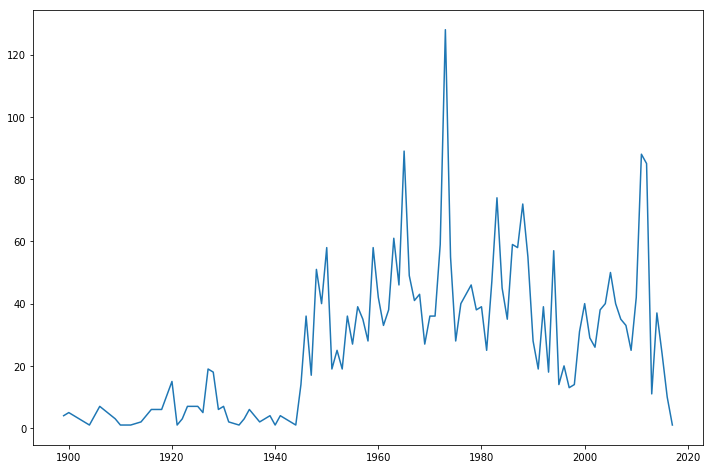

In [31]:
plt.figure(figsize=(12,8))
plt.plot(df1[df1.installation_year < 9999].groupby('installation_year')['spill_street_address'].count())

In [32]:
df1.year.value_counts().sort_index()

2009    383
2010    538
2011    354
2012    374
2013    282
2014    196
2015    263
2016    304
2017    193
2018    259
2019     37
Name: year, dtype: int64

#### _Spills by year._

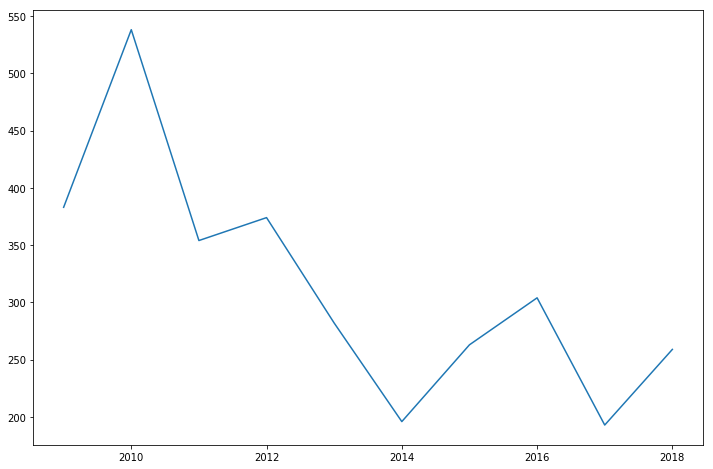

In [33]:
plt.figure(figsize=(12,8))
plt.plot(df1[df1.year < 2019].groupby('year')['spill_street_address'].count())

#### _All observations grouped by month of the year._

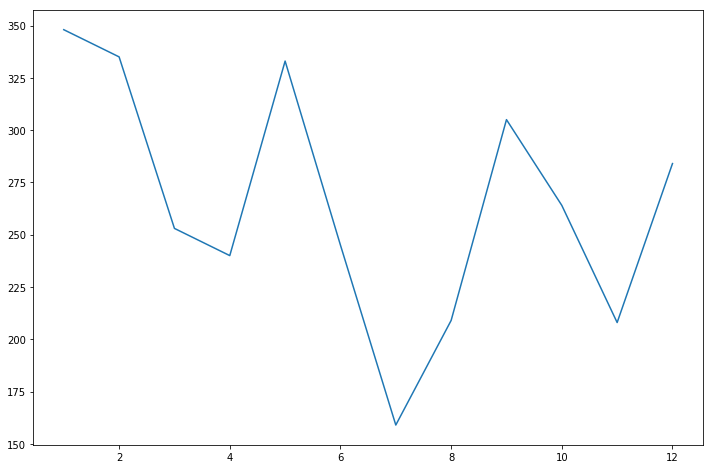

In [34]:
plt.figure(figsize=(12,8))
plt.plot(df1.groupby('month')['spill_street_address'].count())

#### _Colder months mean more grease clogs. Grease solidifies in colder temperatures._

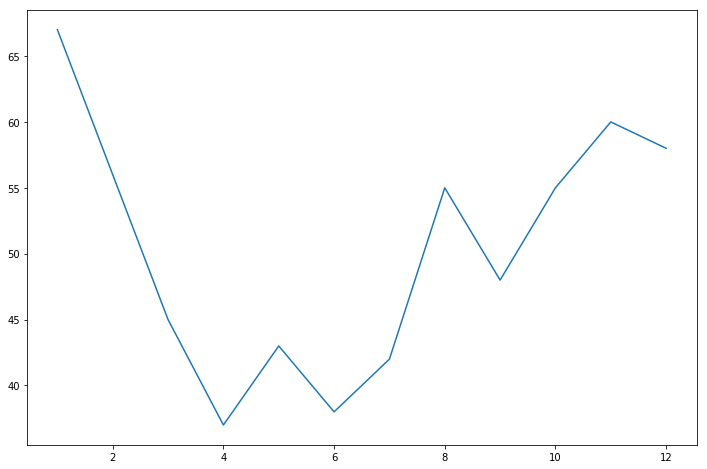

In [35]:
plt.figure(figsize=(12,8))
plt.plot(df1[(df1.root_cause == 'grease') & (df1.year < 2019)].groupby('month')['spill_street_address'].count())